In [1]:
import pandas as pd
import numpy as np

%matplotlib inline
import matplotlib as mpl
import matplotlib.pyplot as plt
import seaborn as sns
import scipy

## 01. Pulsar Dataset

In [2]:
df = pd.read_csv("HTRU_2.csv", header = None, names = ['Profile_mean', 'Profile_stdev', 'Profile_skewness', 'Profile_kurtosis', 'DM_mean', 'DM_stdev', 'DM_skewness', 'DM_kurtosis', 'Class'])

In [3]:
df.head()

Profile_mean  Profile_stdev  Profile_skewness  Profile_kurtosis   DM_mean  \
0    140.562500      55.683782         -0.234571         -0.699648  3.199833   
1    102.507812      58.882430          0.465318         -0.515088  1.677258   
2    103.015625      39.341649          0.323328          1.051164  3.121237   
3    136.750000      57.178449         -0.068415         -0.636238  3.642977   
4     88.726562      40.672225          0.600866          1.123492  1.178930   

    DM_stdev  DM_skewness  DM_kurtosis  Class  
0  19.110426     7.975532    74.242225      0  
1  14.860146    10.576487   127.393580      0  
2  21.744669     7.735822    63.171909      0  
3  20.959280     6.896499    53.593661      0  
4  11.468720    14.269573   252.567306      0

In [4]:
df.shape

(17898, 9)

In [5]:
df.columns

Index(['Profile_mean', 'Profile_stdev', 'Profile_skewness', 'Profile_kurtosis',
       'DM_mean', 'DM_stdev', 'DM_skewness', 'DM_kurtosis', 'Class'],
      dtype='object')

In [6]:
df.isnull().sum()

Profile_mean        0
Profile_stdev       0
Profile_skewness    0
Profile_kurtosis    0
DM_mean             0
DM_stdev            0
DM_skewness         0
DM_kurtosis         0
Class               0
dtype: int64

In [7]:
df.duplicated().sum()

0

In [8]:
df.describe(percentiles = [0.005, 0.01, 0.05, 0.10, 0.25, 0.50, 0.75, 0.90, 0.95, 0.99, 0.995])

Profile_mean  Profile_stdev  Profile_skewness  Profile_kurtosis  \
count  17898.000000   17898.000000      17898.000000      17898.000000   
mean     111.079968      46.549532          0.477857          1.770279   
std       25.652935       6.843189          1.064040          6.167913   
min        5.812500      24.772042         -1.876011         -1.791886   
0.5%      13.573398      28.968244         -0.737330         -1.022526   
1%        19.233672      30.057644         -0.479133         -0.833862   
5%        57.491797      34.714316         -0.231671         -0.556371   
10%       82.958594      37.408646         -0.133219         -0.428868   
25%      100.929688      42.376018          0.027098         -0.188572   
50%      115.078125      46.947479          0.223240          0.198710   
75%      127.085938      51.023202          0.473325          0.927783   
90%      137.236719      54.412099          0.891816          2.765966   
95%      143.072656      56.473756          2.706561         10.138507   
99%      155.742891      61.975944          5.701819         35.463057   
99.5%    161.477031      67.535708          6.184090         41.361095   
max      192.617188      98.778911          8.069522         68.101622   

            DM_mean      DM_stdev   DM_skewness   DM_kurtosis         Class  
count  17898.000000  17898.000000  17898.000000  17898.000000  17898.000000  
mean      12.614400     26.326515      8.303556    104.857709      0.091574  
std       29.472897     19.470572      4.506092    106.514540      0.288432  
min        0.213211      7.370432     -3.139270     -1.976976      0.000000  
0.5%       0.500811      8.765984     -1.177272     -1.860524      0.000000  
1%         0.603654      9.307935     -0.875384     -1.713688      0.000000  
5%         1.005853     11.082345      0.530908     -0.499720      0.000000  
10%        1.306605     12.131926      1.979330      2.839540      0.000000  
25%        1.923077     14.437332      5.781506     34.960504      0.000000  
50%        2.801839     18.461316      8.433515     83.064556      0.000000  
75%        5.464256     28.428104     10.702959    139.309331      0.000000  
90%       30.573495     59.080452     13.466038    220.351313      0.000000  
95%       82.966973     74.621642     15.770680    296.379055      1.000000  
99%      155.817759     91.676485     21.159269    517.137142      1.000000  
99.5%    173.156212     95.405519     23.681145    629.834054      1.000000  
max      223.392140    110.642211     34.539844   1191.000837      1.000000

In [9]:
df.dtypes

Profile_mean        float64
Profile_stdev       float64
Profile_skewness    float64
Profile_kurtosis    float64
DM_mean             float64
DM_stdev            float64
DM_skewness         float64
DM_kurtosis         float64
Class                 int64
dtype: object

In [10]:
df['Class'].value_counts()

0    16259
1     1639
Name: Class, dtype: int64

In [11]:
df.isin([0]).any()

Profile_mean        False
Profile_stdev       False
Profile_skewness    False
Profile_kurtosis    False
DM_mean             False
DM_stdev            False
DM_skewness         False
DM_kurtosis         False
Class                True
dtype: bool


#### Outliers

In [12]:
from sklearn.model_selection import train_test_split

df_train, df_test = train_test_split(df, test_size = 0.2, random_state = 42)

In [13]:
df_train.columns

Index(['Profile_mean', 'Profile_stdev', 'Profile_skewness', 'Profile_kurtosis',
       'DM_mean', 'DM_stdev', 'DM_skewness', 'DM_kurtosis', 'Class'],
      dtype='object')

<AxesSubplot:xlabel='Class', ylabel='DM_kurtosis'>

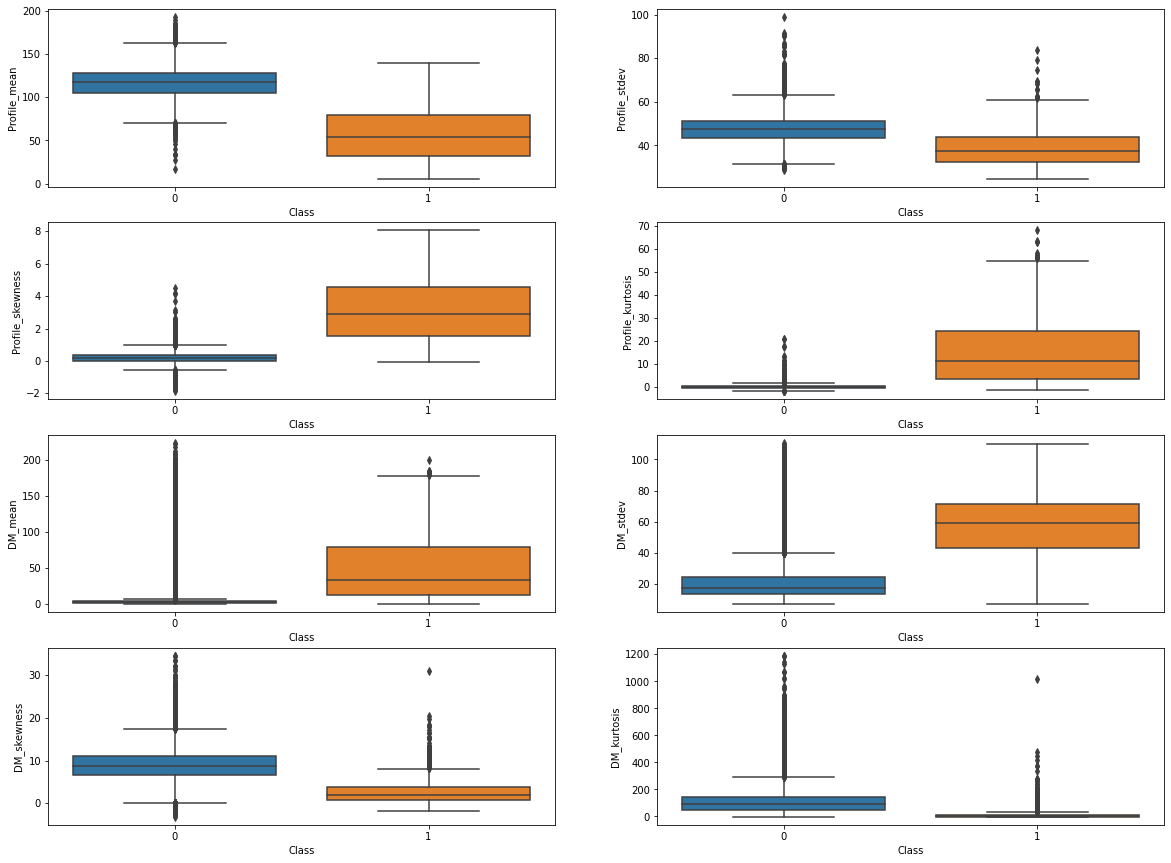

In [14]:
x = df_train['Class']

fig, axes = plt.subplots(4,2, figsize=(20,15))
# fig.delaxes(axes[2][1])
sns.boxplot(y=df_train['Profile_mean'], x = x, ax=axes[0][0])
sns.boxplot(y=df_train['Profile_stdev'], x = x, ax=axes[0][1])
sns.boxplot(y=df_train['Profile_skewness'], x = x, ax=axes[1][0])
sns.boxplot(y=df_train['Profile_kurtosis'], x = x, ax=axes[1][1])
sns.boxplot(y=df_train['DM_mean'], x = x, ax=axes[2][0])
sns.boxplot(y=df_train['DM_stdev'], x = x, ax=axes[2][1])
sns.boxplot(y=df_train['DM_skewness'], x = x, ax=axes[3][0])
sns.boxplot(y=df_train['DM_kurtosis'], x = x, ax=axes[3][1])

#### Presence of outliers becomes apparent through the boxplots

### Remove outliers using IQR

In [15]:
def outlier_treatment(datacolumn, threshold):
    sorted(datacolumn)
    Q1,Q3 = np.percentile(datacolumn , [25,75])
    IQR = Q3 - Q1
    lower_range = Q1 - (threshold * IQR)
    upper_range = Q3 + (threshold * IQR)
    return lower_range,upper_range
a = set()
for i in df_train.drop('Class', axis = 1).columns:
    lower, higher = outlier_treatment(df_train[i], 1.5)
    l = df_train.loc[(df_train[i] < lower) | (df_train[i] > higher)].index
    for j in list(l):
        a.add(j)

In [16]:
a = set()
for i in df_train.drop('Class', axis = 1).columns:
    lower, higher = outlier_treatment(df_train[i], 1.5)
    l = df_train.loc[(df_train[i] < lower) | (df_train[i] > higher)].index
    for j in list(l):
        a.add(j)    

#### Threshold 1.5, Full Dataset

In [17]:
len(a) # for threshold 1.5

3666

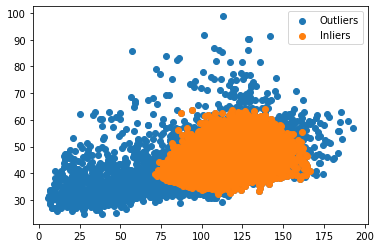

In [19]:
plt.scatter(df_train['Profile_mean'], df_train['Profile_stdev'], label = 'Outliers')
plt.scatter(df_train.drop(a, axis = 0)['Profile_mean'], df_train.drop(a, axis = 0)['Profile_stdev'], label = 'Inliers')
plt.legend()

In [20]:
b = set()
for i in df_train.drop('Class', axis = 1).columns:
    lower, higher = outlier_treatment(df_train[i], 3)
    l = df_train.loc[(df_train[i] < lower) | (df_train[i] > higher)].index
    for j in list(l):
        b.add(j) 

#### Threshold 1.5, Full Dataset

In [21]:
len(b) # for threshold 3.0

2405

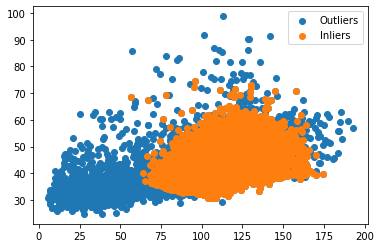

In [25]:
plt.scatter(df_train['Profile_mean'], df_train['Profile_stdev'], label = 'Outliers')
plt.scatter(df_train.drop(b, axis = 0)['Profile_mean'], df_train.drop(b, axis = 0)['Profile_stdev'], label = 'Inliers')
plt.legend()

#### The number of outliers reduce as we increase the threshold of IQR multiples used

In [26]:
df_train.drop(a, axis = 0)

Profile_mean  Profile_stdev  Profile_skewness  Profile_kurtosis  \
14453    108.765625      47.520470          0.191285          0.007945   
15797    121.554688      50.909357          0.083099         -0.087226   
4510     100.265625      43.808975          0.233088          0.451613   
11899    118.460938      41.178518          0.162482          1.050363   
895       97.109375      35.920319          0.364792          2.250635   
...             ...            ...               ...               ...   
4426     115.375000      52.625891          0.448982          0.104404   
6265     124.828125      50.586731          0.233563         -0.286908   
11284    124.312500      53.179053         -0.012418         -0.556021   
11964    115.617188      46.784600          0.218177          0.226757   
860      135.664062      49.933749         -0.089940         -0.226726   

        DM_mean   DM_stdev  DM_skewness  DM_kurtosis  Class  
14453  2.921405  18.009581     8.468258    84.137111      0  
15797  1.098662  11.590431    14.180137   242.867752      0  
4510   1.142977  13.774721    14.148388   215.404864      0  
11899  1.161371  13.353561    14.472023   233.870475      0  
895    2.826923  17.559245     8.733436    90.352868      0  
...         ...        ...          ...          ...    ...  
4426   3.354515  18.365749     7.358722    65.764006      0  
6265   2.342809  13.949966     9.226188   117.308146      0  
11284  7.186455  29.308266     4.531382    21.725143      0  
11964  6.140468  30.271961     5.732201    34.357283      0  
860    3.859532  21.501505     7.398395    62.334018      0  

[10652 rows x 9 columns]

In [27]:
df_train.drop(b, axis = 0)

Profile_mean  Profile_stdev  Profile_skewness  Profile_kurtosis  \
14453    108.765625      47.520470          0.191285          0.007945   
15797    121.554688      50.909357          0.083099         -0.087226   
4510     100.265625      43.808975          0.233088          0.451613   
11899    118.460938      41.178518          0.162482          1.050363   
895       97.109375      35.920319          0.364792          2.250635   
...             ...            ...               ...               ...   
11284    124.312500      53.179053         -0.012418         -0.556021   
11964    115.617188      46.784600          0.218177          0.226757   
5390     116.031250      43.213846          0.663456          0.433088   
860      135.664062      49.933749         -0.089940         -0.226726   
15795    120.726562      50.472256          0.346178          0.184797   

        DM_mean   DM_stdev  DM_skewness  DM_kurtosis  Class  
14453  2.921405  18.009581     8.468258    84.137111      0  
15797  1.098662  11.590431    14.180137   242.867752      0  
4510   1.142977  13.774721    14.148388   215.404864      0  
11899  1.161371  13.353561    14.472023   233.870475      0  
895    2.826923  17.559245     8.733436    90.352868      0  
...         ...        ...          ...          ...    ...  
11284  7.186455  29.308266     4.531382    21.725143      0  
11964  6.140468  30.271961     5.732201    34.357283      0  
5390   0.785117  11.628149    17.055215   312.204325      0  
860    3.859532  21.501505     7.398395    62.334018      0  
15795  0.769231  11.792603    17.662222   329.548016      0  

[11913 rows x 9 columns]

### Removing outliers using std dev

In [28]:
from scipy import stats

def std_dev_outliers(threshold):
    z_scores = stats.zscore(df_train.drop('Class', axis = 1))
    abs_z_scores = np.abs(z_scores)
    filtered_entries = (abs_z_scores < threshold).all(axis=1)
    df_new = df_train[filtered_entries]
    return df_new

#### Outliers outside 2.5 std dev

In [29]:
df_new = std_dev_outliers(2.5)

In [30]:
len(df_train) - len(df_new)

1778

1778 outliers found

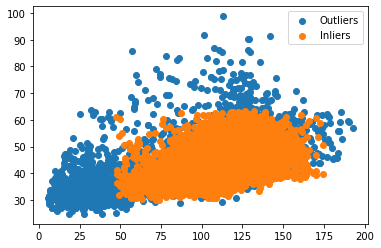

In [31]:
plt.scatter(df.drop(df_new.index)['Profile_mean'], df.drop(df_new.index)['Profile_stdev'], label = 'Outliers')
plt.scatter(df_new['Profile_mean'], df_new['Profile_stdev'], label = 'Inliers')
plt.legend()

#### Outliers outside 3.0 std dev

In [32]:
df_new = std_dev_outliers(3.0)

In [33]:
len(df_train) - len(df_new)

1377

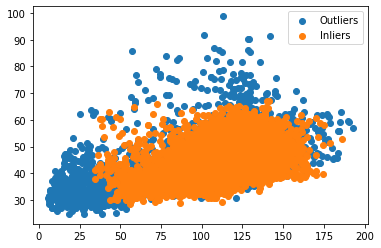

In [34]:
plt.scatter(df.drop(df_new.index)['Profile_mean'], df.drop(df_new.index)['Profile_stdev'], label = 'Outliers')
plt.scatter(df_new['Profile_mean'], df_new['Profile_stdev'], label = 'Inliers')
plt.legend()

The number of outliers reduced as we chose a higher std dev threshold

If we did not take the entire dataset but any specific attribute, then the number of outliers detected will reduce. The outlier detection function for both std dev and IQR method detects outliers per attribute and then collates them.

## 02. Modified Fish

In [35]:
df = pd.read_csv("Fish_Missing.csv")

In [36]:
df.head()

Species  Weight  Length1  Length2  Length3   Height   Width
0   Bream   242.0     23.2     25.4     30.0  11.5200  4.0200
1   Bream   290.0     24.0     26.3     31.2  12.4800  4.3056
2   Bream   290.0     24.0     26.3     31.2  12.4800  4.3056
3   Bream   340.0     23.9     26.5     31.1  12.3778  4.6961
4   Bream   363.0     26.3     29.0     33.5  12.7300  4.4555

In [37]:
df.shape

(163, 7)

In [38]:
df.columns

Index(['Species', 'Weight', 'Length1', 'Length2', 'Length3', 'Height',
       'Width'],
      dtype='object')

Missing/Null values

In [39]:
df.isnull().sum()

Species     0
Weight      2
Length1     7
Length2    12
Length3    14
Height      6
Width      12
dtype: int64

Dropping duplicates

Number of duplicates

In [40]:
df.duplicated().sum()

3

Dropping the duplcates

In [41]:
df.drop_duplicates(inplace = True)

In [42]:
df.shape

(160, 7)

In [43]:
df.describe(percentiles = [0.005, 0.01, 0.05, 0.10, 0.25, 0.50, 0.75, 0.90, 0.95, 0.99, 0.995])

Weight     Length1     Length2     Length3      Height       Width
count   158.000000  153.000000  148.000000  146.000000  154.000000  148.000000
mean    399.208228   26.725490   28.518919   31.964384    9.142442    4.557105
std     359.522386    9.962756   10.747044   11.540404    4.227363    1.771885
min       0.000000    7.500000    8.400000    8.800000    1.738800    1.047600
0.5%      4.631500    8.868000    9.429000   10.250000    1.917198    1.121688
1%        6.356000    9.664000   10.129000   11.160000    1.975286    1.153852
5%        9.800000   11.460000   12.070000   13.575000    2.376450    1.284290
10%      28.370000   13.800000   14.910000   16.850000    4.739280    2.308950
25%     120.000000   19.800000   21.000000   23.500000    6.111150    3.531750
50%     272.500000   25.400000   27.150000   30.950000    7.806200    4.335000
75%     650.000000   32.800000   36.000000   39.775000   12.371850    5.889375
90%     932.500000   39.640000   41.000000   45.400000   15.459420    6.783990
95%    1000.000000   41.460000   44.650000   48.525000   16.416120    7.393715
99%    1571.500000   56.000000   60.000000   64.000000   18.691236    7.979239
99.5%  1610.750000   56.720000   60.901000   65.100000   19.046963    9.164370
max    1650.000000   59.000000   63.400000   68.000000   20.000000   12.000000

In [44]:
df.dtypes

Species     object
Weight     float64
Length1    float64
Length2    float64
Length3    float64
Height     float64
Width      float64
dtype: object

In [45]:
df['Species'].value_counts()

Perch        56
Bream        36
Roach        20
Pike         17
Smelt        14
Parkki       11
Whitefish     6
Name: Species, dtype: int64

Dropping the 2 rows where Weight is null as that is the target variable

In [46]:
df.drop(df.loc[df['Weight'].isna()].index, inplace = True)

In [47]:
df.isin([0]).any()

Species    False
Weight      True
Length1    False
Length2    False
Length3    False
Height     False
Width      False
dtype: bool

In [48]:
df['Weight'].isin([0]).value_counts()

False    157
True       1
Name: Weight, dtype: int64

In [49]:
df.loc[df['Weight'].isin([0])]

Species  Weight  Length1  Length2  Length3  Height   Width
43   Roach     0.0     19.0     20.5      NaN  6.4752  3.3516

#### Dropping 1 '0' value in Weight attribute

In [50]:
mask1 = df.loc[df['Weight'].isin([0])]
df.drop(mask1.index, axis = 0, inplace = True)

In [51]:
df.shape

(157, 7)

### Outliers using std dev

In [52]:
from scipy import stats

z_scores = stats.zscore(df.drop('Species', axis = 1))
abs_z_scores = np.abs(z_scores)
filtered_entries = (abs_z_scores < 3).all(axis=1)
df_new = df[filtered_entries]

In [53]:
df_new.shape

(0, 7)

No outliers using std deviation and threshold value of 3

### Train Test Split

In [54]:
from sklearn.model_selection import train_test_split

df_train, df_test = train_test_split(df, test_size = 0.2, random_state = 42)

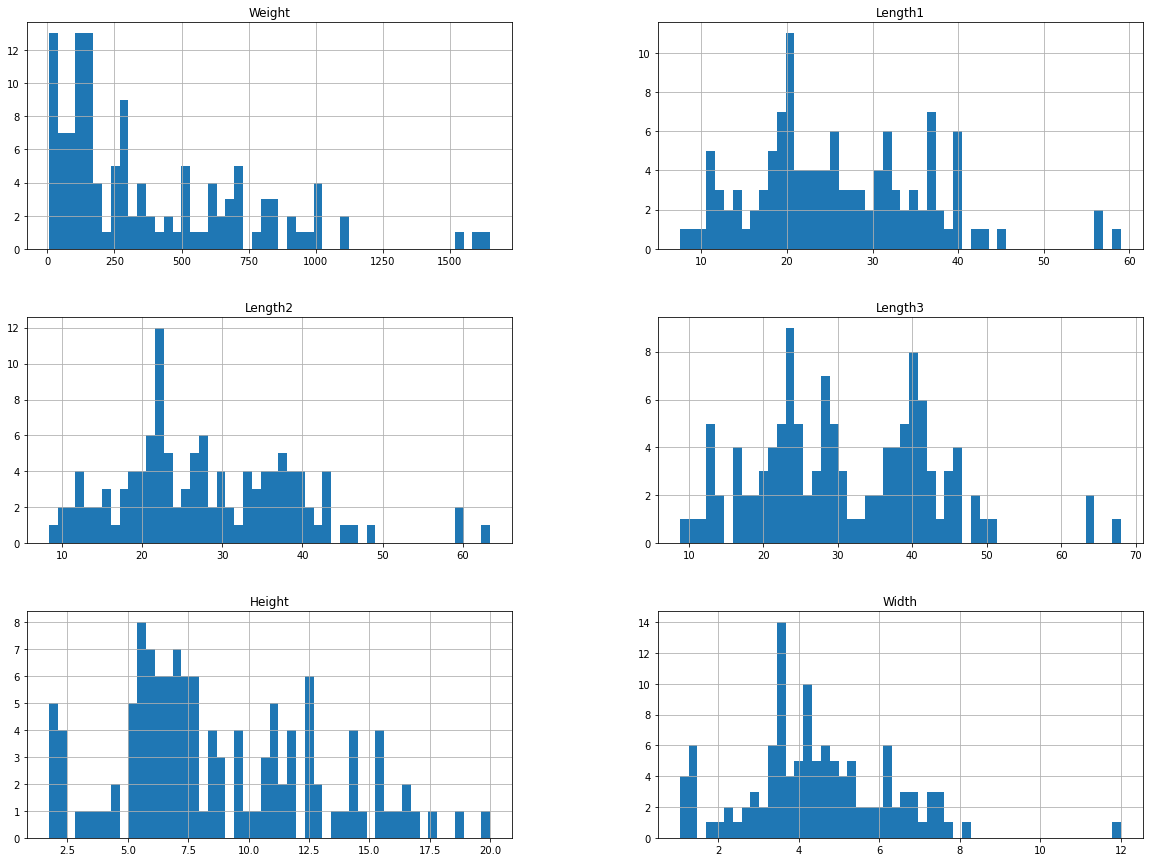

In [55]:
df_train.hist(bins = 50, figsize = (20, 15))
plt.show()

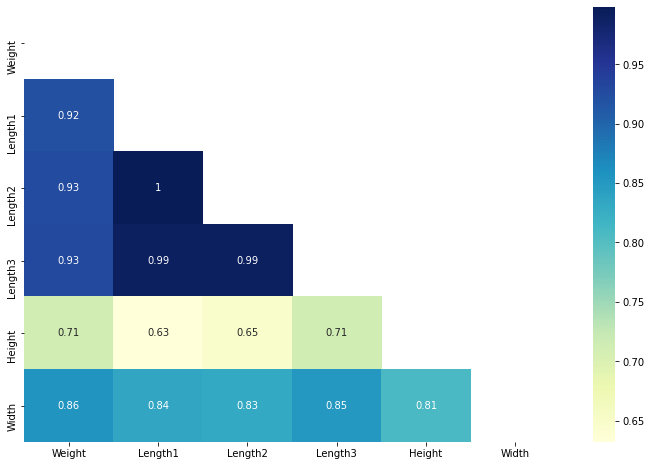

In [56]:
corr_mat = df_train.corr()
plt.figure(figsize=(12, 8))
sns.heatmap(corr_mat, mask = np.triu(corr_mat), cmap="YlGnBu", annot = True)
plt.show()

#### Length1 is highly correlated to Length2 and Length3 indicating multi-collinearity. We will thus use just Length1 out of the 3 as our feature variable

In [57]:
target = 'Weight'
features = ['Length1', 'Height', 'Width', 'Species']

In [58]:
df_train['Species'].value_counts()

Perch        46
Bream        25
Roach        17
Pike         12
Smelt        11
Parkki        9
Whitefish     5
Name: Species, dtype: int64

#### Species wise distribution

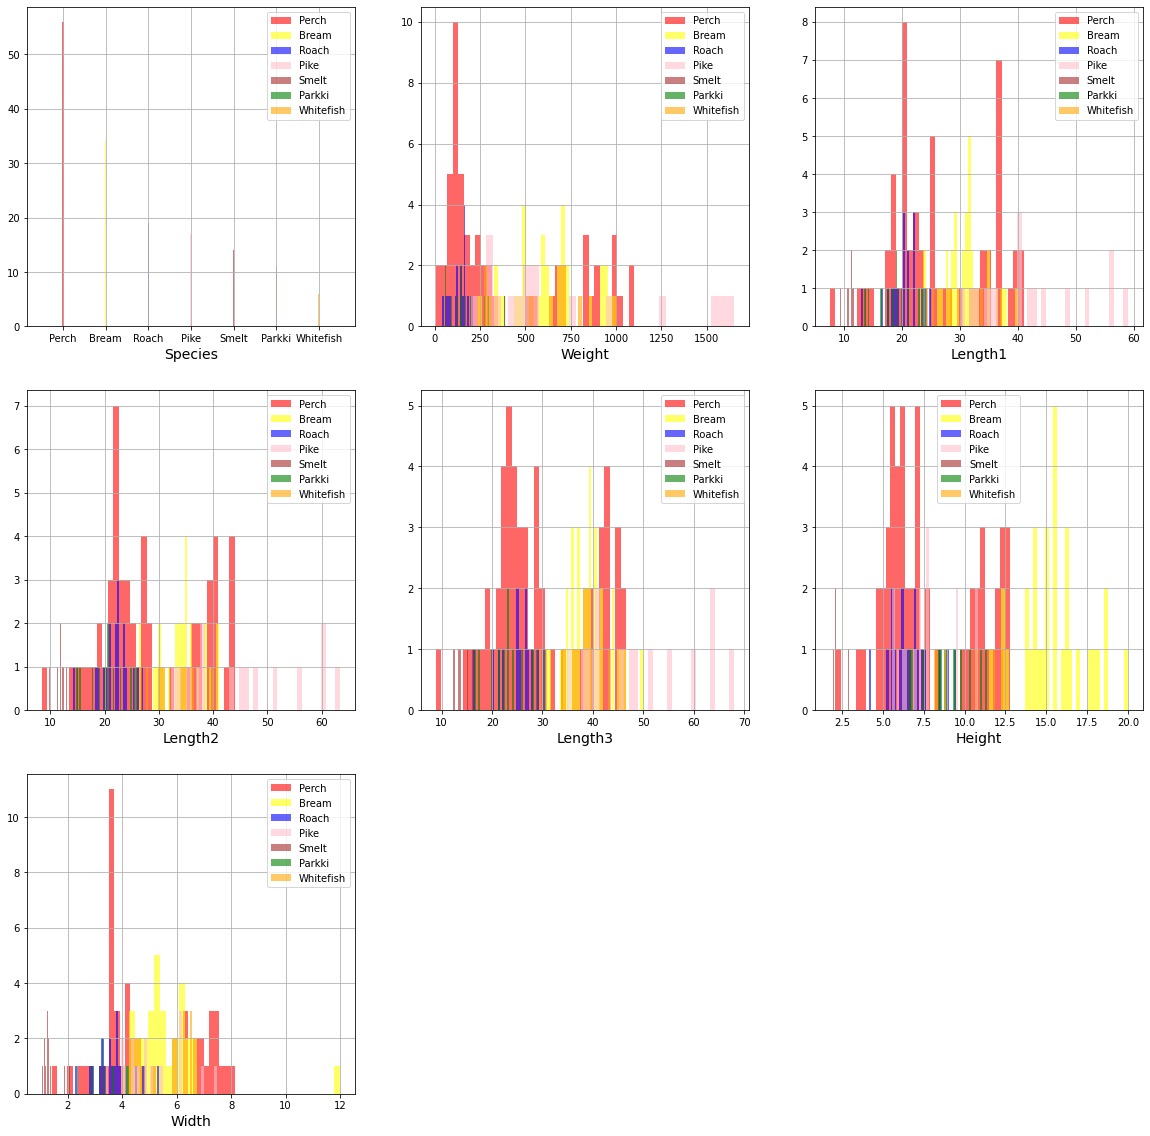

In [59]:
plt.figure(figsize=(20, 20))

for i, column in enumerate(df_train, 1):
    plt.subplot(3, 3, i)
    df[df['Species'] == 'Perch'][column].hist(bins=35, color='red', label='Perch', alpha=0.6)
    df[df['Species'] == 'Bream'][column].hist(bins=35, color='yellow', label='Bream', alpha=0.6)
    df[df['Species'] == 'Roach'][column].hist(bins=35, color='blue', label='Roach', alpha=0.6)
    df[df['Species'] == 'Pike'][column].hist(bins=35, color='pink', label='Pike', alpha=0.6)
    df[df['Species'] == 'Smelt'][column].hist(bins=35, color='brown', label='Smelt', alpha=0.6)
    df[df['Species'] == 'Parkki'][column].hist(bins=35, color='green', label='Parkki', alpha=0.6)
    df[df['Species'] == 'Whitefish'][column].hist(bins=35, color='orange', label='Whitefish', alpha=0.6)
    plt.legend()
    plt.xlabel(column, fontsize = 14)
    print()

Null values

<AxesSubplot:>

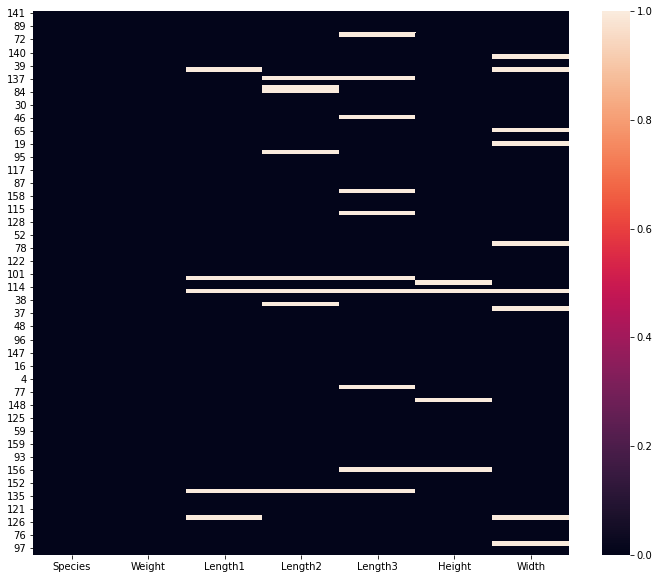

In [60]:
plt.figure(figsize = (12, 10))
sns.heatmap(df_train.isnull())

Pairplots

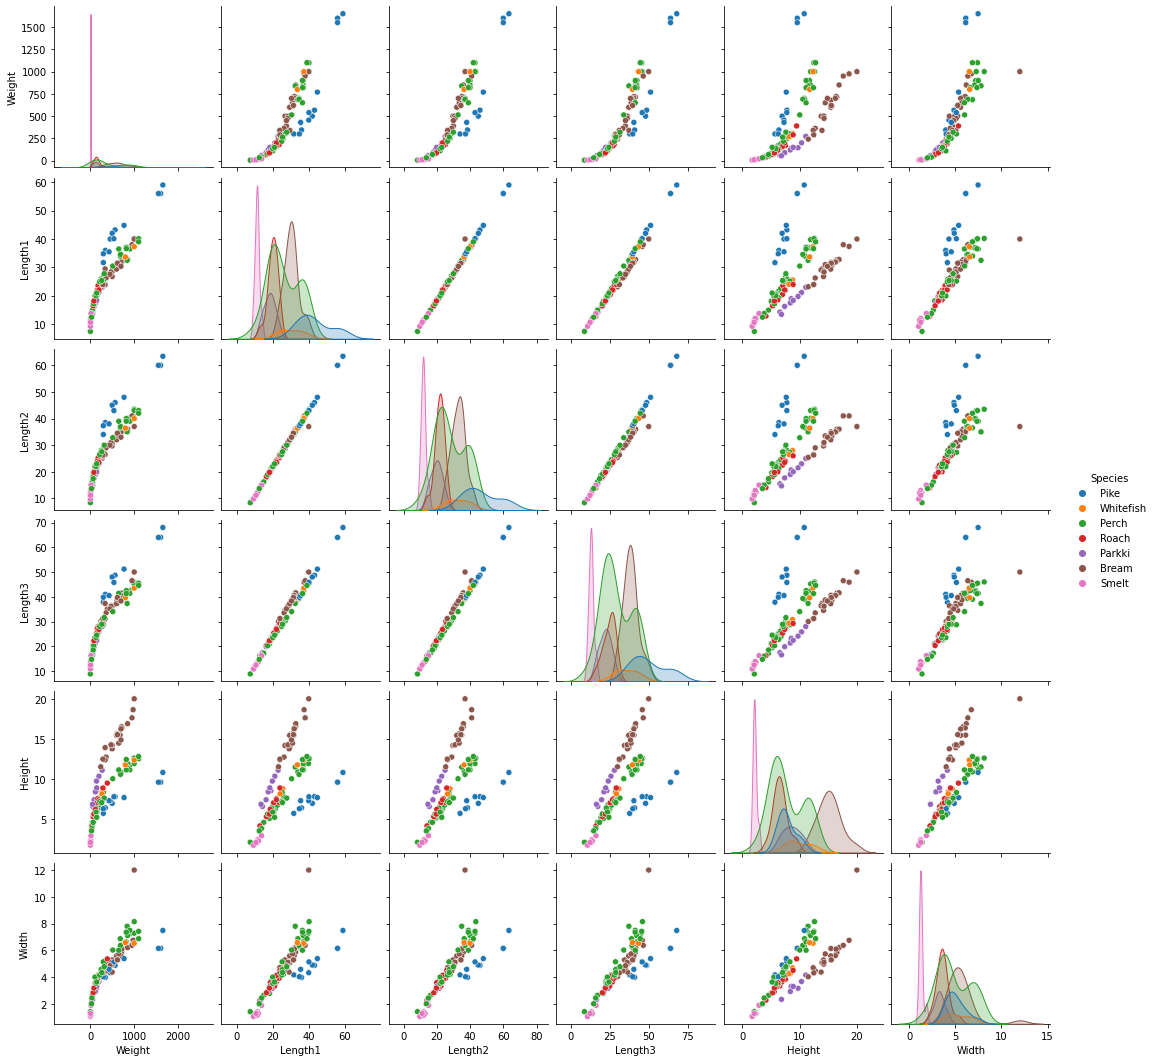

In [61]:
sns.pairplot(df_train, hue = 'Species')

Height and Length pair shows good species wise seperation

In [62]:
df_train.columns

Index(['Species', 'Weight', 'Length1', 'Length2', 'Length3', 'Height',
       'Width'],
      dtype='object')

<AxesSubplot:xlabel='Species', ylabel='Width'>

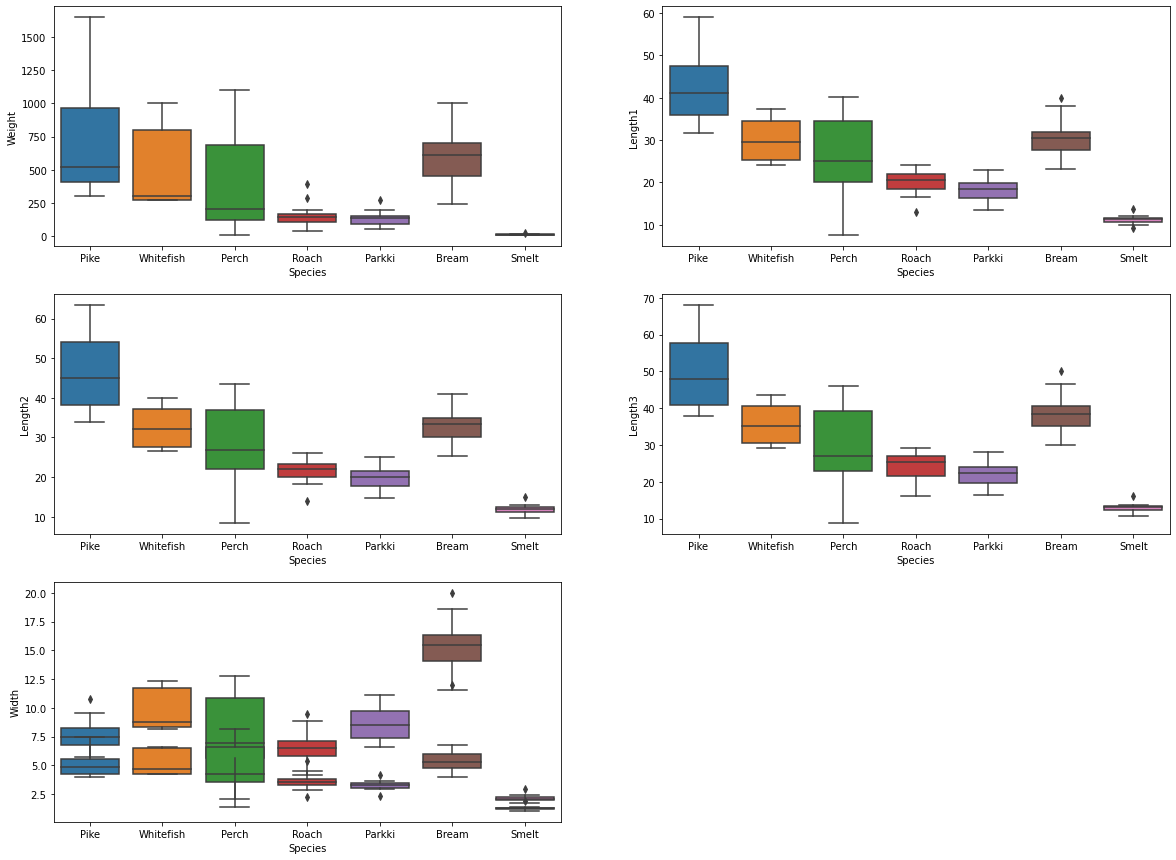

In [63]:
x = df_train['Species']

fig, axes = plt.subplots(3,2, figsize=(20,15))
fig.delaxes(axes[2][1])
sns.boxplot(y=df_train['Weight'], x = x, ax=axes[0][0])
sns.boxplot(y=df_train['Length1'], x = x, ax=axes[0][1])
sns.boxplot(y=df_train['Length2'], x = x, ax=axes[1][0])
sns.boxplot(y=df_train['Length3'], x = x, ax=axes[1][1])
sns.boxplot(y=df_train['Height'], x = x, ax=axes[2][0])
sns.boxplot(y=df_train['Width'], x = x, ax=axes[2][0])

### Outliers using IQR

In [64]:
def outlier_treatment(datacolumn):
    sorted(datacolumn)
    Q1,Q3 = np.percentile(datacolumn , [25,75])
    IQR = Q3 - Q1
    lower_range = Q1 - (1.5 * IQR)
    upper_range = Q3 + (1.5 * IQR)
    return lower_range,upper_range

In [65]:
a = set()
for i in df_train.drop('Species', axis = 1).columns:
    lower, higher = outlier_treatment(df_train[i])
    l = df_train.loc[(df_train[i] < lower) | (df_train[i] > higher)].index
    for j in list(l):
        a.add(j)    

In [66]:
a

{145, 146, 147}

In [67]:
df_train.drop(a, axis = 0, inplace = True)

/Users/sc47/programs/main/venv/lib/python3.8/site-packages/pandas/core/frame.py:4167: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  return super().drop(


## 03. MODIFIED FISH Dataset

In [68]:
df = pd.read_csv("Fish_Modified.csv")

In [69]:
df.head()

Species  Weight  Length1  Length2  Length3   Height   Width
0   Bream   242.0     23.2     25.4     30.0  11.5200  4.0200
1   Bream   290.0     24.0     26.3     31.2  12.4800  4.3056
2   Bream   290.0     24.0     26.3     31.2  12.4800  4.3056
3   Bream   340.0     23.9     26.5     31.1  12.3778  4.6961
4   Bream   363.0     26.3     29.0     33.5  12.7300  4.4555

In [70]:
df.shape

(163, 7)

In [71]:
df.columns

Index(['Species', 'Weight', 'Length1', 'Length2', 'Length3', 'Height',
       'Width'],
      dtype='object')

In [72]:
df.isnull().sum()

Species    0
Weight     0
Length1    0
Length2    0
Length3    0
Height     0
Width      0
dtype: int64

In [73]:
df.duplicated().sum()

3

In [74]:
df.drop_duplicates(inplace = True)

In [75]:
df.describe(percentiles = [0.005, 0.01, 0.05, 0.10, 0.25, 0.50, 0.75, 0.90, 0.95, 0.99, 0.995])

Weight     Length1     Length2     Length3      Height       Width
count   160.000000  160.000000  160.000000  160.000000  160.000000  160.000000
mean    401.952054   26.504341   28.629863   31.416686    9.048438    4.532821
std     358.090741    9.904792   10.719196   11.662783    4.343864    1.753175
min       0.000000    7.500000    8.400000    8.800000    1.738800    1.047600
0.5%      4.690500    8.931000    9.513000   10.390000    1.924194    1.127736
1%        6.372000    9.713000   10.213000   11.272000    1.975658    1.155244
5%        9.800000   11.473077   12.168077   13.309091    2.260500    1.285130
10%      30.790000   13.470000   14.660000   16.180000    3.794400    2.247920
25%     120.000000   19.700000   21.225000   23.500000    5.949000    3.525000
50%     281.500000   25.500000   27.500000   29.700000    7.789000    4.376200
75%     650.000000   32.700000   35.250000   39.700000   12.378550    5.602222
90%     927.500000   39.080000   41.100000   45.530000   15.441060    6.747540
95%    1000.000000   41.145000   45.880000   49.146667   16.369560    7.354655
99%    1570.500000   56.000000   60.000000   64.000000   18.684108    7.937683
99.5%  1610.250000   56.615000   60.697000   64.820000   19.009589    8.932890
max    1650.000000   59.000000   63.400000   68.000000   20.000000   12.000000

In [76]:
df.dtypes

Species     object
Weight     float64
Length1    float64
Length2    float64
Length3    float64
Height     float64
Width      float64
dtype: object

In [77]:
df['Species'].value_counts()

Perch        56
Bream        36
Roach        20
Pike         17
Smelt        14
Parkki       11
Whitefish     6
Name: Species, dtype: int64

In [78]:
df.isin([0]).any()

Species    False
Weight      True
Length1    False
Length2    False
Length3    False
Height     False
Width      False
dtype: bool

In [79]:
df['Weight'].isin([0]).value_counts()

False    159
True       1
Name: Weight, dtype: int64

In [80]:
df.loc[df['Weight'].isin([0])]

Species  Weight  Length1  Length2  Length3  Height   Width
43   Roach     0.0     19.0     20.5     24.7  6.4752  3.3516

#### Dropping 1 '0' value in Weight attribute

In [81]:
mask1 = df.loc[df['Weight'].isin([0])]
df.drop(mask1.index, axis = 0, inplace = True)

In [82]:
df.shape

(159, 7)

### Removing outliers using std dev

In [83]:
from scipy import stats

z_scores = stats.zscore(df.drop('Species', axis = 1))
abs_z_scores = np.abs(z_scores)
filtered_entries = (abs_z_scores < 3).all(axis=1)
df_new = df[filtered_entries]

4 outliers found using standard deviation. But not removed. Removing later.

In [84]:
df_new.shape

(155, 7)

In [85]:
# df = df_new

In [86]:
from sklearn.model_selection import train_test_split

df_train, df_test = train_test_split(df, test_size = 0.2, random_state = 42)

array([[<AxesSubplot:title={'center':'Weight'}>,
        <AxesSubplot:title={'center':'Length1'}>],
       [<AxesSubplot:title={'center':'Length2'}>,
        <AxesSubplot:title={'center':'Length3'}>],
       [<AxesSubplot:title={'center':'Height'}>,
        <AxesSubplot:title={'center':'Width'}>]], dtype=object)

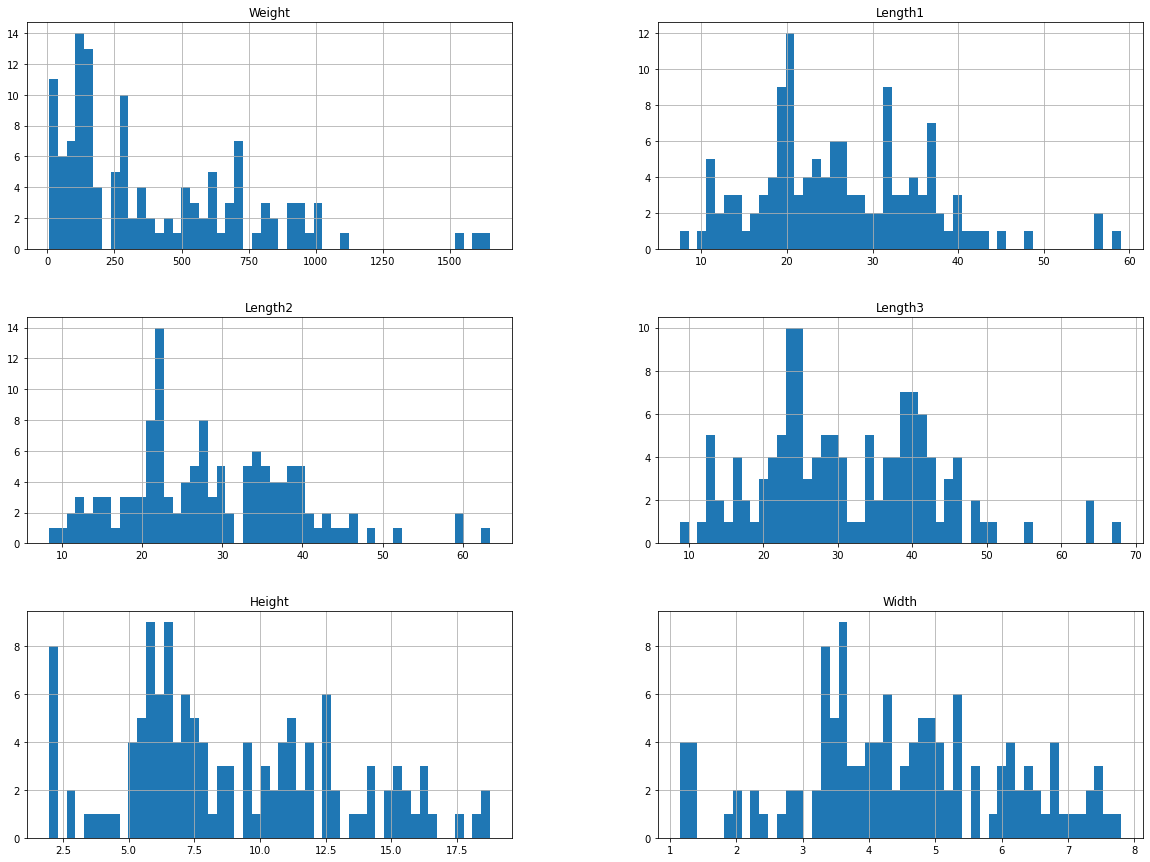

In [87]:
df_train.hist(bins = 50, figsize = (20, 15))

<AxesSubplot:>

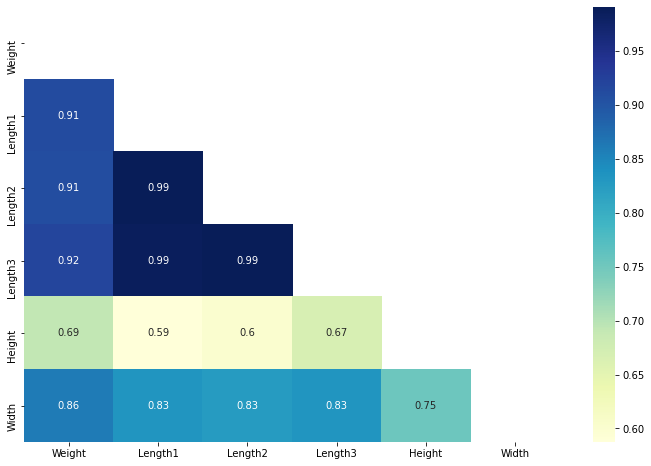

In [88]:
corr_mat = df_train.corr()
plt.figure(figsize=(12, 8))
sns.heatmap(corr_mat, mask = np.triu(corr_mat), cmap="YlGnBu", annot = True)

#### Length1 is highly correlated to Length2 and Length3 indicating multi-collinearity. We will thus use just Length1 out of the 3 as our feature variable

In [89]:
target = 'Weight'
features = ['Length1', 'Height', 'Width', 'Species']

In [90]:
df_train['Species'].value_counts()

Perch        47
Bream        26
Roach        18
Pike         14
Parkki       10
Smelt         9
Whitefish     3
Name: Species, dtype: int64

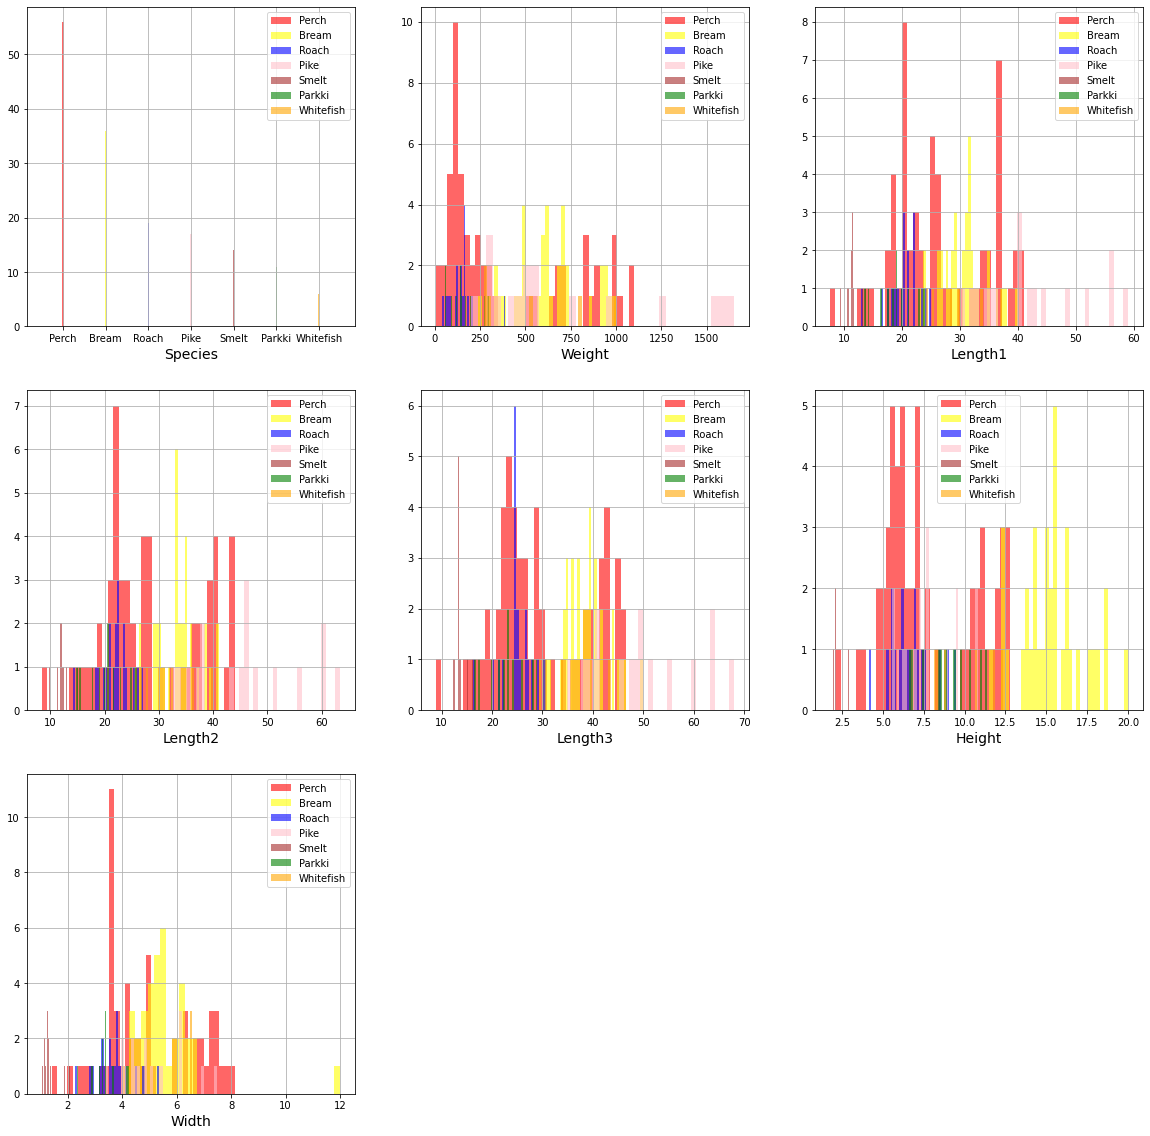

In [91]:
plt.figure(figsize=(20, 20))

for i, column in enumerate(df_train, 1):
    plt.subplot(3, 3, i)
    df[df['Species'] == 'Perch'][column].hist(bins=35, color='red', label='Perch', alpha=0.6)
    df[df['Species'] == 'Bream'][column].hist(bins=35, color='yellow', label='Bream', alpha=0.6)
    df[df['Species'] == 'Roach'][column].hist(bins=35, color='blue', label='Roach', alpha=0.6)
    df[df['Species'] == 'Pike'][column].hist(bins=35, color='pink', label='Pike', alpha=0.6)
    df[df['Species'] == 'Smelt'][column].hist(bins=35, color='brown', label='Smelt', alpha=0.6)
    df[df['Species'] == 'Parkki'][column].hist(bins=35, color='green', label='Parkki', alpha=0.6)
    df[df['Species'] == 'Whitefish'][column].hist(bins=35, color='orange', label='Whitefish', alpha=0.6)
    plt.legend()
    plt.xlabel(column, fontsize = 14)
    print()

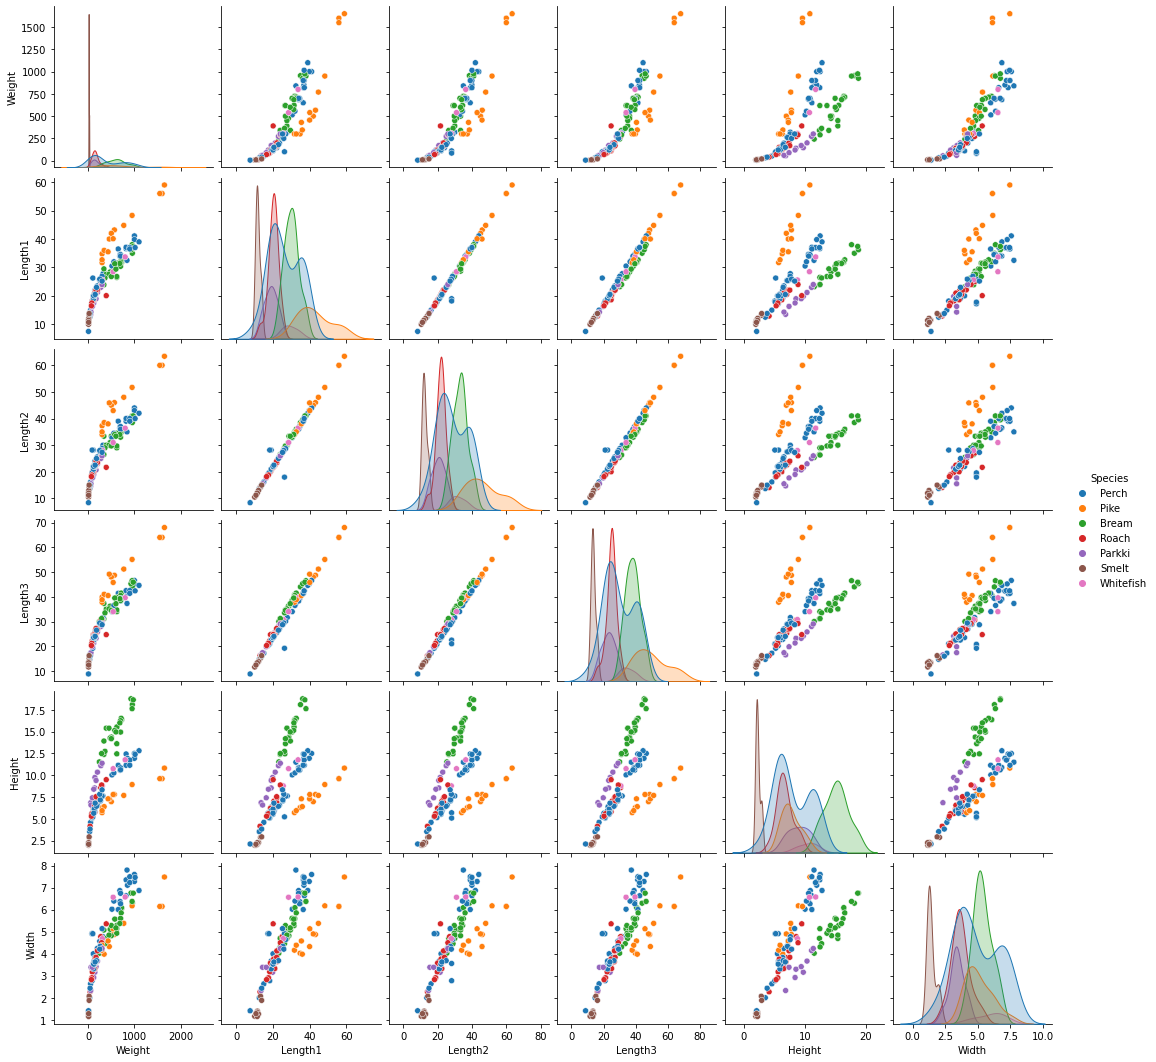

In [92]:
sns.pairplot(df_train, hue = 'Species')

In [93]:
df_train.columns

Index(['Species', 'Weight', 'Length1', 'Length2', 'Length3', 'Height',
       'Width'],
      dtype='object')

In [94]:
df_train.dtypes

Species     object
Weight     float64
Length1    float64
Length2    float64
Length3    float64
Height     float64
Width      float64
dtype: object

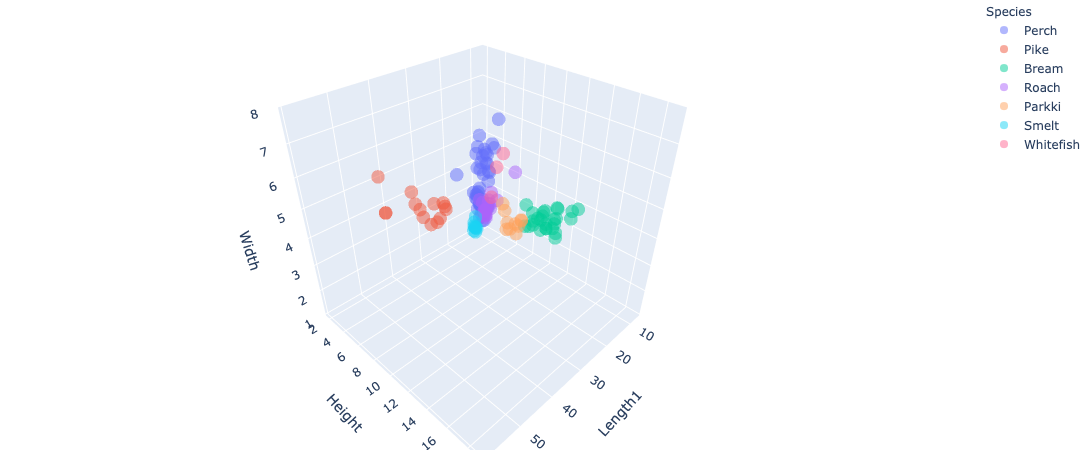

In [95]:
import plotly.express as px
# df = px.data.iris()
fig = px.scatter_3d(df_train, x='Length1', y='Height', z='Width',
              color='Species', size_max=18,
            opacity=0.5)

# tight layout
fig.update_layout(margin=dict(l=0, r=0, b=0, t=0))

In [96]:
df_train['height_weight_ratio'] = df_train['Height'] / df_train['Weight']

<ipython-input-96-5571e78b8910>:1: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy



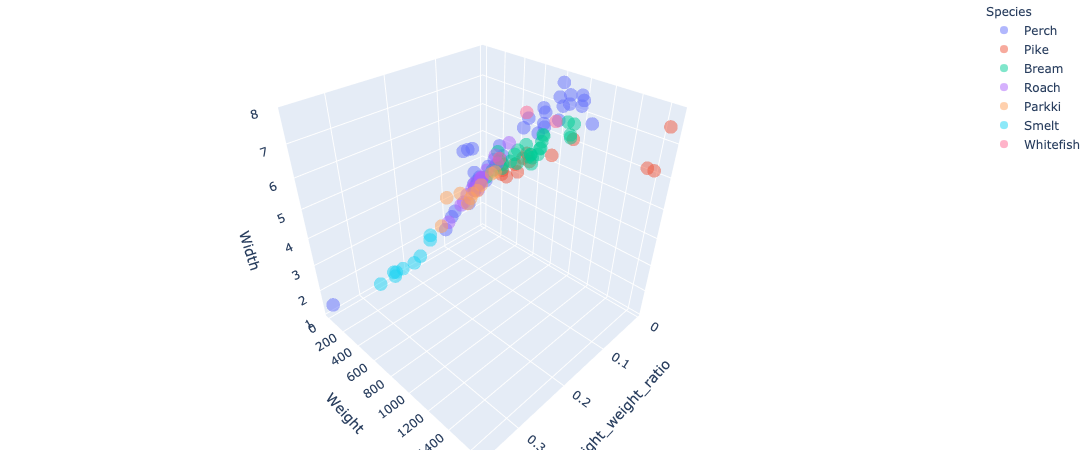

In [97]:
import plotly.express as px
# df = px.data.iris()
fig = px.scatter_3d(df_train, x= 'height_weight_ratio', y='Weight', z='Width',
              color='Species', size_max=18,
            opacity=0.5)

# tight layout
fig.update_layout(margin=dict(l=0, r=0, b=0, t=0))

In [98]:
df_train.columns

Index(['Species', 'Weight', 'Length1', 'Length2', 'Length3', 'Height', 'Width',
       'height_weight_ratio'],
      dtype='object')

<AxesSubplot:xlabel='Species', ylabel='Width'>

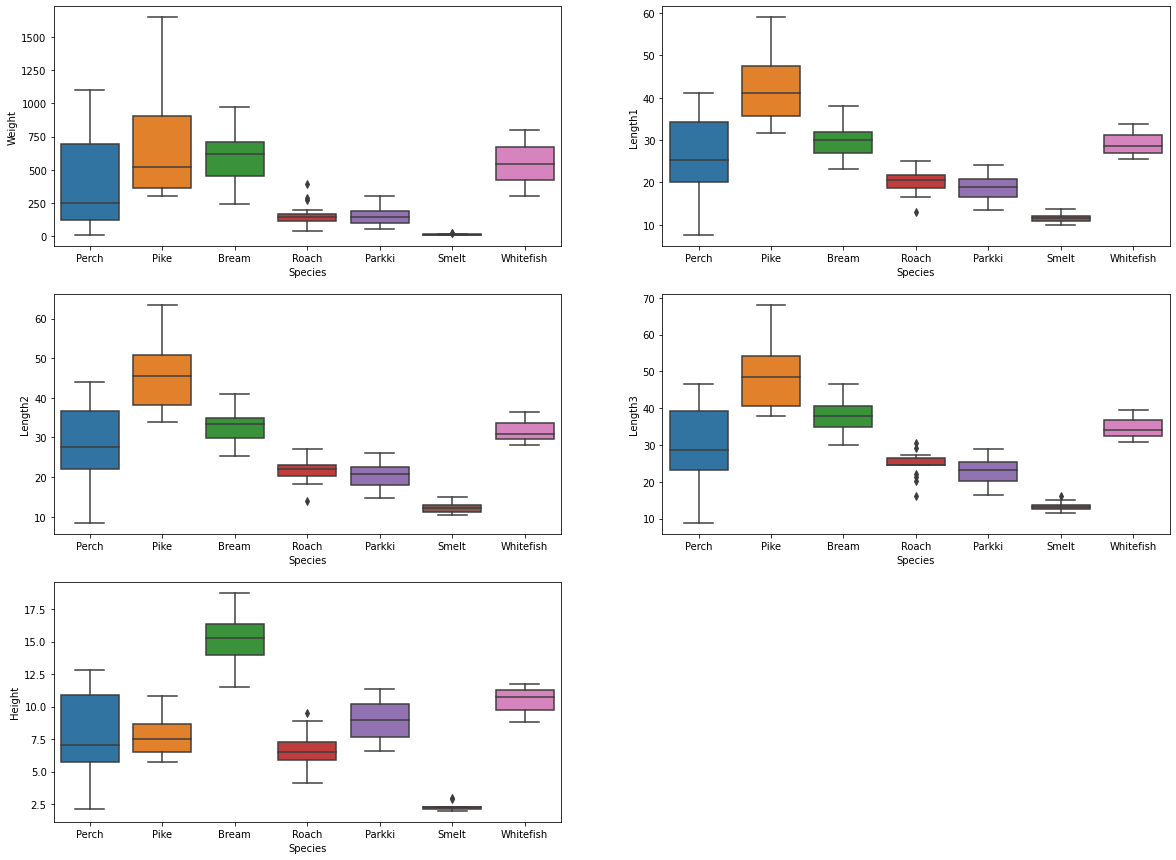

In [99]:
x = df_train['Species']

fig, axes = plt.subplots(3,2, figsize=(20,15))
fig.delaxes(axes[2][1])
sns.boxplot(y=df_train['Weight'], x = x, ax=axes[0][0])
sns.boxplot(y=df_train['Length1'], x = x, ax=axes[0][1])
sns.boxplot(y=df_train['Length2'], x = x, ax=axes[1][0])
sns.boxplot(y=df_train['Length3'], x = x, ax=axes[1][1])
sns.boxplot(y=df_train['Height'], x = x, ax=axes[2][0])
sns.boxplot(y=df_train['Width'], x = x, ax=axes[2][1])

### Remove further outliers per species

To do: Group by species to drop by species quartile ranges. Different for different species.

In [100]:
df_species = df_train.groupby(['Species']).quantile([0.25, 0.75]) # Grouping and getting their Quartiles 

In [101]:
df_species

Weight  Length1  Length2  Length3     Height     Width  \
Species                                                                  
Bream     0.25  456.25   27.000   29.775   34.775  13.979550  4.864700   
          0.75  710.50   31.875   35.000   40.575  16.330125  5.789180   
Parkki    0.25   97.50   16.600   18.025   20.175   7.651950  3.191425   
          0.75  192.50   20.850   22.625   25.375  10.193450  3.600300   
Perch     0.25  120.00   20.000   22.000   23.150   5.774250  3.589500   
          0.75  695.00   34.250   36.750   39.150  10.858000  6.508750   
Pike      0.25  366.25   35.625   38.125   40.625   6.537000  4.337975   
          0.75  905.00   47.425   50.775   54.125   8.642650  5.952000   
Roach     0.25  112.50   18.725   20.200   24.700   5.882025  3.301975   
          0.75  167.00   21.775   23.175   26.350   7.305950  3.831475   
Smelt     0.25    9.70   10.800   11.300   12.600   2.083200  1.255800   
          0.75   12.20   12.100   13.000   13.800   2.277000  1.393600   
Whitefish 0.25  423.00   27.050   29.500   32.400   9.761000  5.621800   
          0.75  670.00   31.100   33.700   36.800  11.252600  6.567800   

                height_weight_ratio  
Species                              
Bream     0.25             0.022130  
          0.75             0.033150  
Parkki    0.25             0.052614  
          0.75             0.079194  
Perch     0.25             0.015400  
          0.75             0.049656  
Pike      0.25             0.009541  
          0.75             0.018143  
Roach     0.25             0.039023  
          0.75             0.055003  
Smelt     0.25             0.171344  
          0.75             0.230663  
Whitefish 0.25             0.017299  
          0.75             0.024291

In [102]:
df_species.loc['Bream', 'Weight'].loc[0.25]

456.25

In [103]:
df_species.loc['Bream', 'Weight'].loc[0.75]

710.5

Outlier removal function per species per column for entire data collated together

In [104]:
def outlier_treatment(species, datacolumn):
    sorted(datacolumn)
    Q1, Q3 = df_species.loc[species, datacolumn].loc[0.25], df_species.loc[species, datacolumn].loc[0.75]
    IQR = Q3 - Q1
    lower_range = Q1 - (1.5 * IQR)
    upper_range = Q3 + (1.5 * IQR)
    return lower_range,upper_range

In [105]:
species_list = list(df_train['Species'].value_counts().index)
a = set()
for i in df_train.drop('Species', axis = 1).columns:
    for species in species_list:
        lower, higher = outlier_treatment(species, i)
        l = (df_train.loc[df_train['Species'] == species, i] < lower) | (df_train.loc[df_train['Species'] == species, i] > higher)
        l = list(l[l].index)
        print("Species: {}, Column: {}, Outliers: {}".format(species, i, len(l)))
        for j in l:
            a.add(j)    

Species: Perch, Column: Weight, Outliers: 0
Species: Bream, Column: Weight, Outliers: 0
Species: Roach, Column: Weight, Outliers: 3
Species: Pike, Column: Weight, Outliers: 0
Species: Parkki, Column: Weight, Outliers: 0
Species: Smelt, Column: Weight, Outliers: 2
Species: Whitefish, Column: Weight, Outliers: 0
Species: Perch, Column: Length1, Outliers: 0
Species: Bream, Column: Length1, Outliers: 0
Species: Roach, Column: Length1, Outliers: 1
Species: Pike, Column: Length1, Outliers: 0
Species: Parkki, Column: Length1, Outliers: 0
Species: Smelt, Column: Length1, Outliers: 0
Species: Whitefish, Column: Length1, Outliers: 0
Species: Perch, Column: Length2, Outliers: 0
Species: Bream, Column: Length2, Outliers: 0
Species: Roach, Column: Length2, Outliers: 1
Species: Pike, Column: Length2, Outliers: 0
Species: Parkki, Column: Length2, Outliers: 0
Species: Smelt, Column: Length2, Outliers: 0
Species: Whitefish, Column: Length2, Outliers: 0
Species: Perch, Column: Length3, Outliers: 0
Speci

In [106]:
len(a)

13

Total 13 outliers detected when taken on a per species basis instead of overall